<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/python_ml_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나이브 베이즈 분류기

선형모델과 유사. LogisticRegression, LinerarSVC 같은 선형 분류기보다 훈련 속도가 빠른 편이지만, 그 대신 일반화 성능이 조금 뒤쳐진다.

특징은, 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합한다.
scikit-learn에 구현된 나이브 베이즈 분류기는 세 가지로 나뉜다.

GaussianNB, BernoulliNB, MultinomialNB

- 전자는 연속적인 데이터 적용
- 중자는 이진 데이터
- 후자는 카운트 데이터(문장에 나온 단어 카운트)

즉 중,후자는 대부분 텍스트 데이터를 분류할 때 사용한다.

In [8]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=fcebf1af259d21466dcd7ce682d2cd374a63fec1c76e57d580bba1751f283013
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
# BernoulliNB 예시, 특성중 0이 아닌 것 몇갠지 세기

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0 ,1])

In [3]:
counts = {}

for label in np.unique(y):
  # 각 클래스에 대해 반복
  # 특성 마다 1 이 나타난 횟수를 센다.
  counts[label] = X[y == label].sum(axis=0)
  
print("특성 카운트: \n", counts)

특성 카운트: 
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [4]:
np.unique(y)
# array([0, 1])

array([0, 1])

##결론

GaussianNB 와 MultinomialNB는 계산하는 통계 데이터의 종류가 조금 다르다.
Mult는 클래스별로 특성의 평균을 계산하고 Gaus는 클래스별로 각 특성과 분산과 평균을 저장한다.

MultionmialNB 와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수를 가지고 있지만, 성능향상에 크게 기여하진 않는다.

GaussianNB는 대부분 고차원 데이터셋에 사용하고 다른 두갠 희소한 데이터를 카운트하는데 사용한다.

나이브베이즈 모델과 선형 모델의 장단점은 비슷하다. 훈련과 예측속도가 빠르며 훈련 과정을 이해하기 쉽다. 너무 오래 걸리는 데이터셋의 경우 나이브 베이즈 모델을 시도해볼만 하다.



# 결정 트리

결정트리는 분류와 회귀문제에 널리 사용하는 모델이다. 학습은 질문을 이어 나가면서 한다. 질문은 스무고개 놀이의 "예/아니오" 질문과 비슷하다.

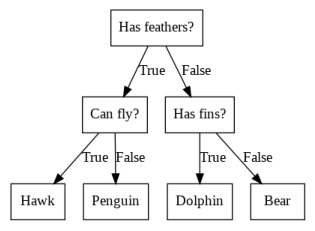

In [10]:
mglearn.plots.plot_animal_tree()

## 결정 트리 만들기

일반적인 트리만들기에서, 모든 리프 노드가 순수 노드가 될 때까지 진행하면서 모델이 매우 복잡해지는 경우가 생긴다. 즉 결정 경계가 멀리 떨어진 이상치 하나에 너무 민감하게 반응한다는 것이다. 

따라서 과대적합을 막는 두가지 방법이 있다. 사후 가지치기, 사전 가지치기

scikit-learn에선 사전 가지치기만 지원한다다.
- DecisionTreeRegreesor
- DecisionTreeClassifier

사전 가지치기란, 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 또는 노드가 분할하기 위한 포인트의 최소 개수를 지정하는 것이다.

In [13]:
from pandas.core.common import random_state
from scipy.sparse.construct import random
# 결정트리 / DecisionTreeClassifier / 유방암 데이터셋 / 가지치기 비교

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

# 선형모델에서 정확도 95% 보다 낮다. 과대적합. 가지치기

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [14]:
tree = DecisionTreeClassifier(max_depth= 4 ,random_state = 0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


## 결정 트리 분석하기

트리모듈 export_graphviz 를 사용하면 시각화 할 수 있다.
(그 밖에도 .dot 파일을 읽을 수 있는 프로그램을 사용해도 된다)

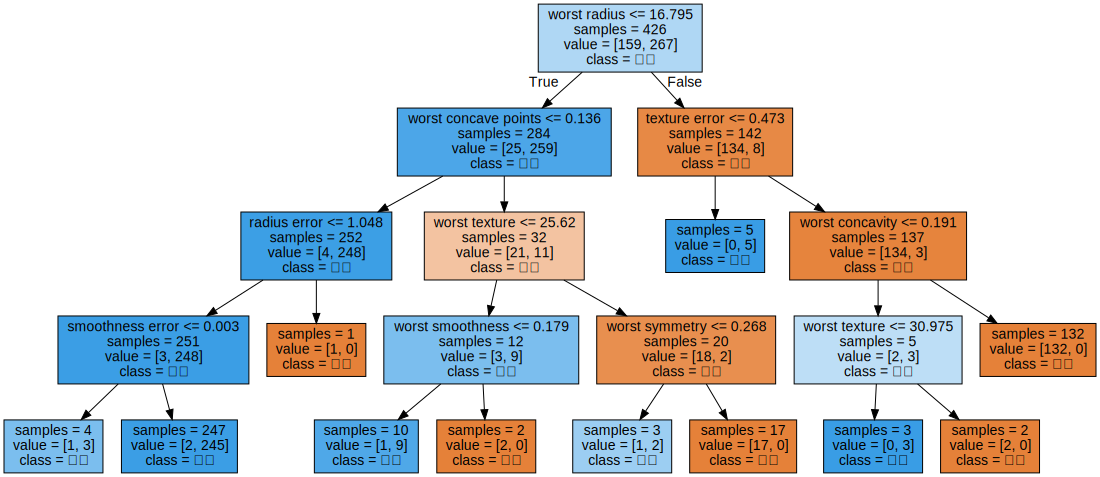

In [19]:
# .dot 파일 생성
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"], feature_names = cancer.feature_names, impurity=False, filled=True)


# 파일 읽어서 시각화
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

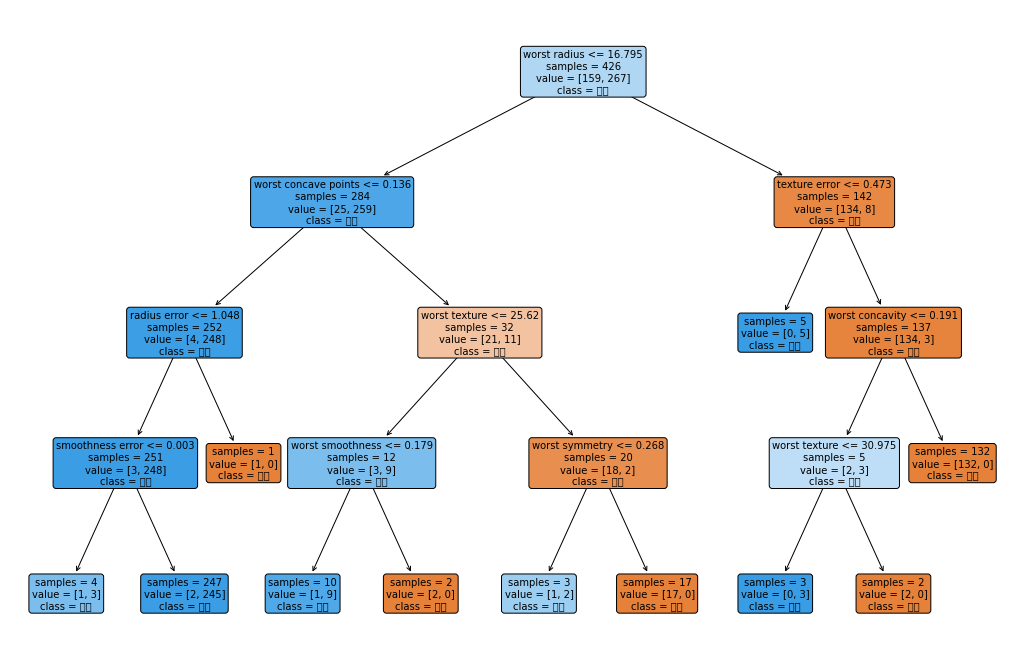

In [27]:
# scikit-learn 0.2 버전에서 plot_tree 함수를 이용하면 .dot 파일을 만들지 않고 바로 트리를 그릴 수 있다.
# 이 함수는 export_graphviz() 함수에서 사용한 class_names, feature_names 등 매개변수를 모두 지원한다.

from sklearn.tree import plot_tree
plt.figure(figsize=(18,12))
plot_tree(tree, class_names=["악성", "양성"], feature_names = cancer.feature_names, impurity=False, filled=True,
          rounded=True, fontsize=10)
plt.show()


## 트리의 특성 중요도


In [21]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


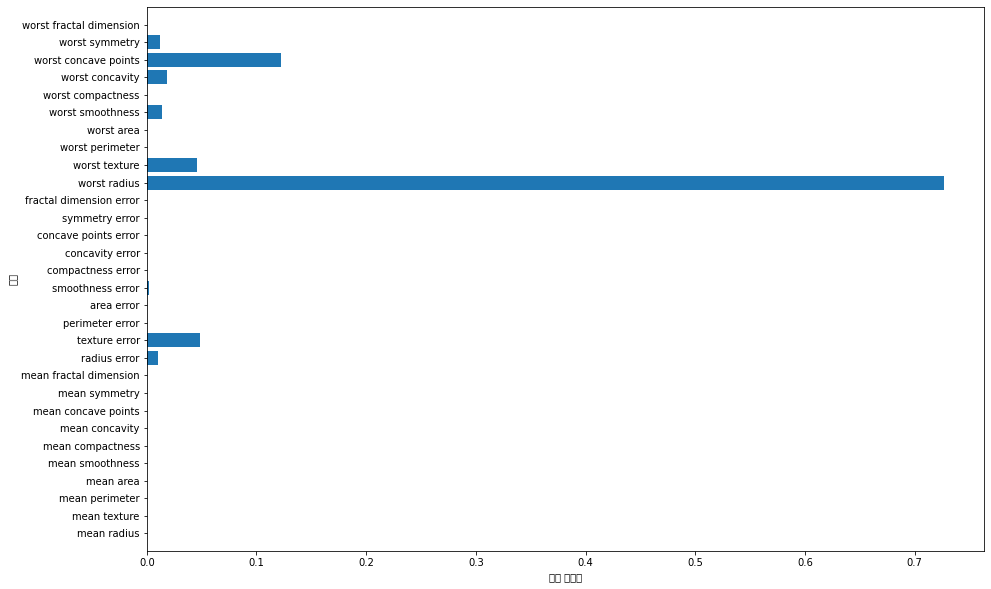

In [26]:
# 특성 중요도 시각화하기

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[-1]
  plt.figure(figsize=(15, 10))
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("특성 중요도")
  plt.ylabel("특성")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

# 어떤 특성이 feature importance 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아니다.
# 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있다.

Feature importances: [0. 1.]


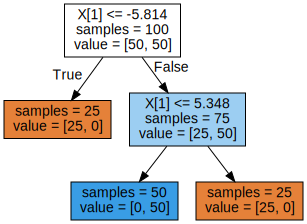

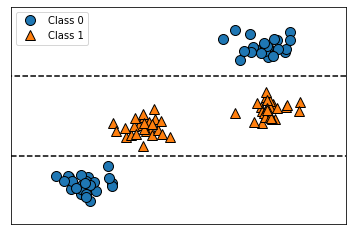

In [28]:
# 특성 중요도 값은 그 특성이 중요하다고 알려주지만, 그 특성 만으로 음성과 양성을 나눌 수는 없다.여러 이해관계가 섞여 있기 때문이다.
# 예시를 들어보자

mglearn.plots.plot_tree_not_monotone()

위그림은 두 개의 특성과 두 개의 클래스를 가진 데이터셋을 보여준다.

- X[1]에 있는 정보만 사용되었고 X[0]의 정보는 사용되지 않았다.

- X[1]과 출력 클래스의 관계는 단순하게 비례 반비례한다고 할 수 없다.


Text(0, 0.5, '가격 ($/Mbyte)')

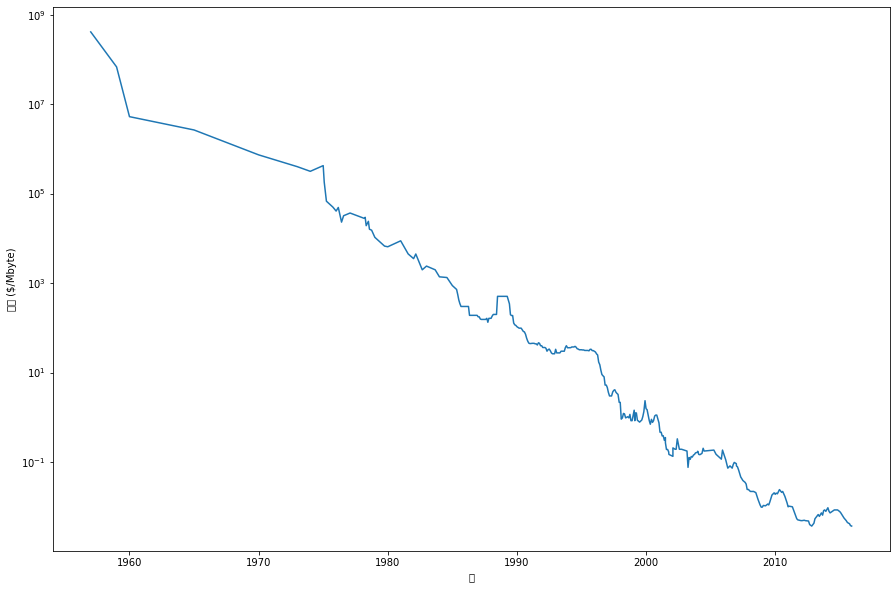

In [33]:
# 분류와 마찬가지로 회귀도 비숫하게 적용된다.
# 게다가 모든 다른 트리 기반 회귀 모델은 외삽(extrapolation), 즉 훈련 데이터의 범위 밖의 포인트에 대해 예측/추정(extrapolation) 할 수 없다.

# 컴퓨터 메모리 가격 동향 데이터셋, 1메가바이트당 가격
import pandas as pd
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.figure(figsize=(15, 10))
plt.yticks(fontname = 'Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

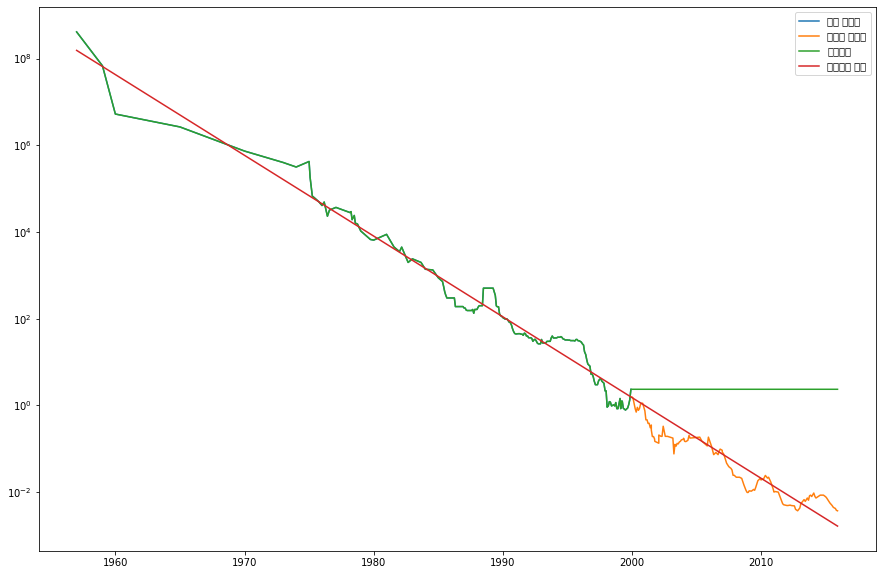

In [37]:
# 선형기반과 트리 기반의 차이를 보자.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 데스트 데이터로 만든다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용한다.
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾼다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_rag = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_rag.predict(X_all)

# 예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


# 시각화 하기
plt.figure(figsize=(15, 10))
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()